<a href="https://colab.research.google.com/github/yihong1011/TibameML/blob/main/05_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
# 載入鐵達尼號訓練資料和測試(預測)資料
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f9c147112d0>)

In [111]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
predict_df = pd.read_csv("test.csv", encoding="utf-8")

In [112]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [113]:
datas = pd.concat([train_df, predict_df], axis=0, ignore_index=True)
datas = datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [114]:
# 資料預處理
# 1.1 chank有多少空值
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [115]:
# 1.2 chack每一個欄位是哪幾種型態
# 數值:[Age, SibSp, Parch, Ticket(#share), Fare]
# 類別:[Pclass, Name(mid), Sex, Cabin(first), Embarked]
# 補空值(最可能出現的值)
# 數值:中位數
# 類別:最常出現的值

In [116]:
# 處理Cabin(只需要區域代號)
def cabinchange(c):
  if pd.isna(c):
    return None
  else:
    return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabinchange)

In [117]:
# 處理Ticket(需要知道每張票號分享的次數)
counts = datas["Ticket"].value_counts()# 計算每張票的出現(share)次數
def ticketchange(t):
  if pd.isna(t):
    return None
  else:
    return counts[t]
datas["Ticket"] = datas["Ticket"].apply(ticketchange)

In [118]:
import re
n = "Braund, Mr. Owen Harris"
# .+: 任意一個字一次以上 ,: 逗號 (.+): 任意一個字一次以上, 並且group起來 \.: 點 .+: 任意一個字一次以上
pat = r".+,(.+)\..+"
re.match(pat, n).group(1).strip()

'Mr'

In [119]:
# 處理Name(只需要中間名)
# n = "Braund, Mr. Owen Harris"
# n.split(",")[-1].split(".")[0].strip()
def namechange(n):
  return n.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(namechange)

In [120]:
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [121]:
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [122]:
med = datas.median().drop(["Pclass"])# 取出個欄位的中位數,並把"Pclass"拿掉
datas = datas.fillna(med)
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Cabin    1014
dtype: int64

In [123]:
count = datas["Name"].value_counts()
reserved = count[count > 50].index # 取得有50筆以上的中間名
# 把小於50筆以上的中間名改為None
def namefilter(mid):
  if mid in reserved:
    return mid
  else:
    return None
datas["Name"] = datas["Name"].apply(namefilter)

In [124]:
# 製作One_Hot
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [125]:
df_t = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
], index=["a", "b", "c"])

df_t

,0,1
a,1,2
b,3,4
c,5,6


In [126]:

# .iloc: 依據你的第幾列 -> [1st, 2nd, 3rd]
df_t.iloc[0:]
# # .loc: 依據你的列標籤
# df_t.loc[["a", "c"]]

,0,1
a,1,2
b,3,4
c,5,6


In [127]:
# 切開
import numpy as np
x = np.array(datas.iloc[:len(train_df)])
y = np.array(train_df["Survived"])
x_predict = np.array(datas.iloc[len(train_df):])

In [128]:
len(x)

891

[Text(0.5, 0.875, 'Pclass_1 <= 0.5\ngini = 0.471\nsamples = 571\nvalue = [553, 338]'),
 Text(0.25, 0.625, 'Pclass_2 <= 0.5\ngini = 0.421\nsamples = 429\nvalue = [468, 202]'),
 Text(0.125, 0.375, 'Name_Mr <= 0.5\ngini = 0.377\nsamples = 313\nvalue = [362, 122]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Name_Mr <= 0.5\ngini = 0.49\nsamples = 116\nvalue = [106, 80]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Ticket <= 1.5\ngini = 0.473\nsamples = 142\nvalue = [85, 136]'),
 Text(0.625, 0.375, 'Parch <= 1.5\ngini = 0.492\nsamples = 47\nvalue = [40, 31]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Sex_female <= 0.5\ngini = 0.42\nsamples = 95\nvalue = [45, 105]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

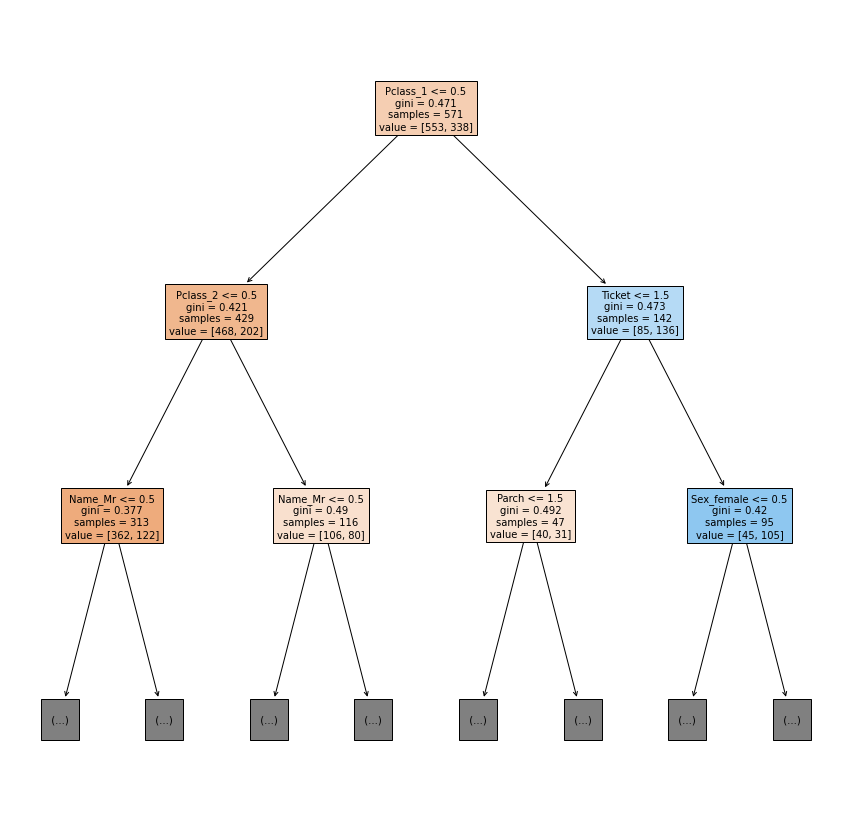

In [129]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1)
clf.fit(x, y)
plt.figure(figsize=(15, 15))
# 你可以挑選十顆裡面的某科把它畫出來, 看一下什麼叫做略有不同
plot_tree(clf.estimators_[2], feature_names=datas.columns, filled=True, max_depth=2)

In [130]:
# 交叉驗證
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=69, max_depth=6)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.82222222 0.86516854 0.76404494 0.88764045 0.84269663 0.80898876
 0.84269663 0.78651685 0.88764045 0.84269663]
0.8350312109862671


In [131]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params = {
    "n_estimators":range(11, 15, 2),
    "max_depth":range(5, 11)
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 11),
                         'n_estimators': range(11, 15, 2)})

In [132]:
# show出最優秀的參數
cv.best_params_

{'max_depth': 9, 'n_estimators': 11}

In [133]:
clf = RandomForestClassifier(n_estimators=69, max_depth=7)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre 
})
df.to_csv("rf.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [134]:
pd.DataFrame({
    "importance":clf.feature_importances_
}, index=datas.columns).sort_values(by="importance", ascending=False)

,importance
Sex_male,0.171299
Name_Mr,0.143062
Fare,0.104038
Sex_female,0.088353
Age,0.086494
Ticket,0.074636
Pclass_3,0.057698
Name_Miss,0.044028
Pclass_1,0.041406
Name_Mrs,0.038049


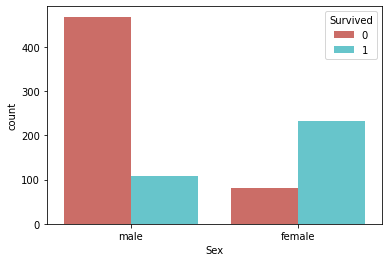

In [135]:
# 畫圖
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"], palette=sns.color_palette("hls", 2))

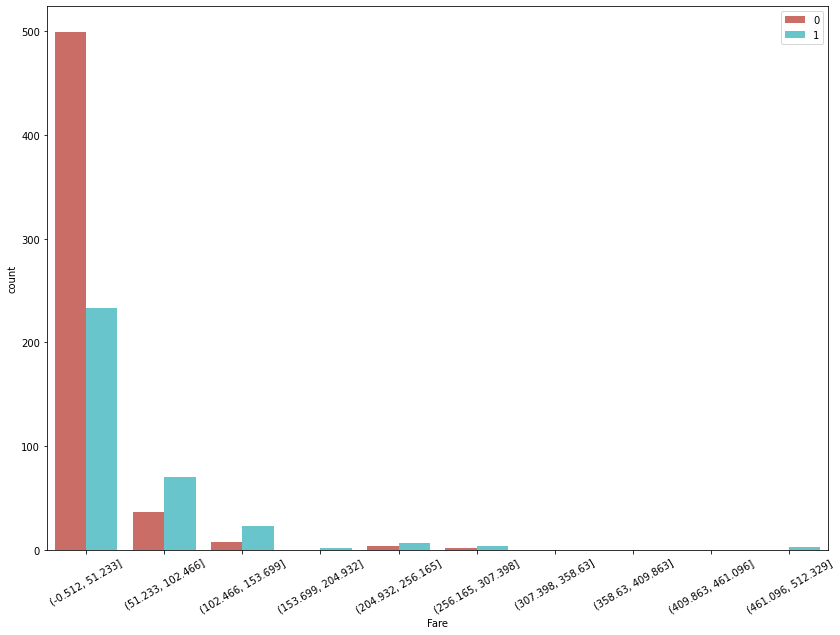

In [136]:
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Fare"], 10)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

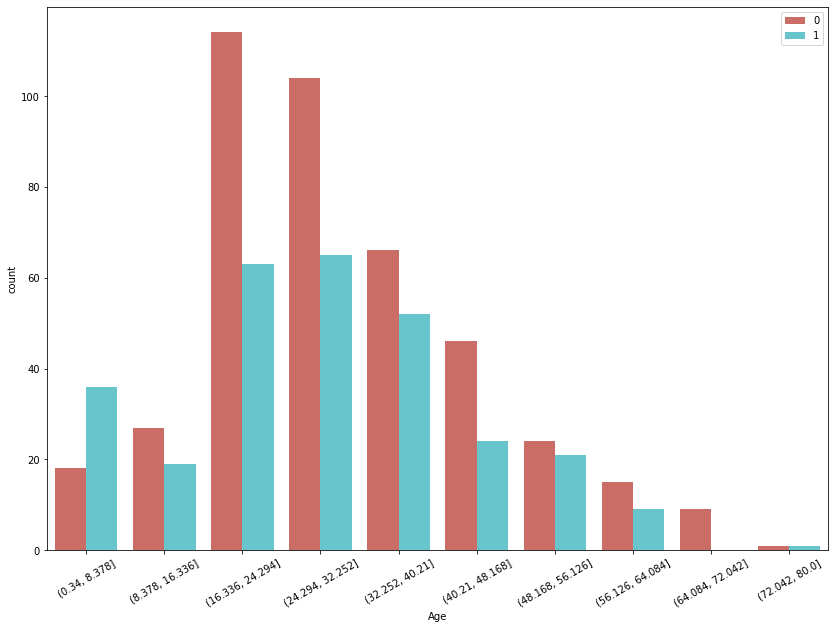

In [137]:
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Age"], 10)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
# 已經是np array, 所以不是用.iloc(pandas)
x_scale = datas_scale[:len(train_df)]
x_predict_scale = datas_scale[len(train_df):]

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 50)
}
cv = GridSearchCV(clf, params, cv=13, n_jobs=-1)
cv.fit(x_scale, y)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 7}
0.8283985835136731


In [140]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre 
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
